In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [147]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Final 1.xlsx")
df

,channel,companies,type,impact,urgency,priority,days_open,num_open_tickets,num_of_tickets_from_company_in_last_month,log_num_open_tickets,log_days_open
0,1,52,2,2,1,2,128,23,10,3.135494,4.852030
1,1,4,3,2,2,2,336,108,2,4.682131,5.817111
2,1,41,3,2,2,2,213,38,1,3.637586,5.361292
3,1,19,3,2,1,1,321,39,9,3.663562,5.771441
4,1,19,3,1,1,1,124,67,12,4.204693,4.820282
...,...,...,...,...,...,...,...,...,...,...,...
683,1,21,3,1,3,1,7,142,5,4.955827,1.945910
684,1,21,3,3,3,1,7,142,5,4.955827,1.945910
685,1,13,3,1,1,1,7,142,2,4.955827,1.945910
686,1,21,3,1,2,1,7,142,5,4.955827,1.945910


In [111]:
dft = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Final 5.xlsx")
dft

,made_sla,companies,contact_type,impact,urgency,priority,days_open,num_open_tickets,num_of_tickets_from_company_in_last_month
0,True,2403,Phone,2,2,2,1,199,1
1,True,2403,Phone,2,2,2,2,199,0
2,True,4416,Phone,2,2,2,2,199,1
3,True,4491,Phone,2,2,2,3,199,12
4,False,3765,Phone,1,2,1,1,199,12
...,...,...,...,...,...,...,...,...,...
23422,True,2058,Email,2,2,2,1,16,2
23423,True,5100,Self service,2,2,2,2,2,0
23424,True,90,Email,2,2,2,3,1,0
23425,True,116,Email,2,2,2,1,3,6


In [193]:
priority =df['urgency'].value_counts()
priority

urgency
2    376
3    189
1    123
Name: count, dtype: int64

In [37]:
# # Split the data into features and target variable
# X = df.drop(['ticketId', 'priority', 'channel'], axis=1)
# y = df['priority']

# # Define the column transformer for preprocessing
# numeric_features = ['num_of_tickets_from_company_in_last_month', 'log_num_open_tickets', 'log_days_open']
# categorical_features = ['channel', 'companies', 'type', 'urgency', 'impact']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Define the logistic regression model
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression())
# ])

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# # Get the coefficient matrix
# coefs = model.named_steps['classifier'].coef_

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

# # Print the coefficient matrix
# print("Coefficient Matrix:")
# print(coefs)

In [192]:
X = df.drop(['log_days_open', 'log_num_open_tickets', 'priority'], axis=1)
y = df['priority']

numeric_features = ['num_of_tickets_from_company_in_last_month', 'num_open_tickets', 'days_open']
categorical_features = ['urgency', 'impact','companies']

# Define the preprocessing steps for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the SVM model
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.67      0.75        42
           2       0.83      0.92      0.88       133
           3       0.69      0.56      0.62        32

    accuracy                           0.82       207
   macro avg       0.79      0.72      0.75       207
weighted avg       0.81      0.82      0.81       207



In [106]:
priority_count = df['impact'].value_counts()
priority_count

impact
2    430
3    206
1    107
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        28
           2       0.90      0.92      0.91        90
           3       0.78      0.70      0.74        20

    accuracy                           0.88       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.88      0.88      0.88       138

Feature Importances:
channel: 0.002360389062990681
companies: 0.10223645075412595
type: 0.09941473757704539
impact: 0.2769185829540664
urgency: 0.18941612333462918
days_open: 0.10807739931986844
num_open_tickets: 0.13918707203570338
num_of_tickets_from_company_in_last_month: 0.08238924496157062


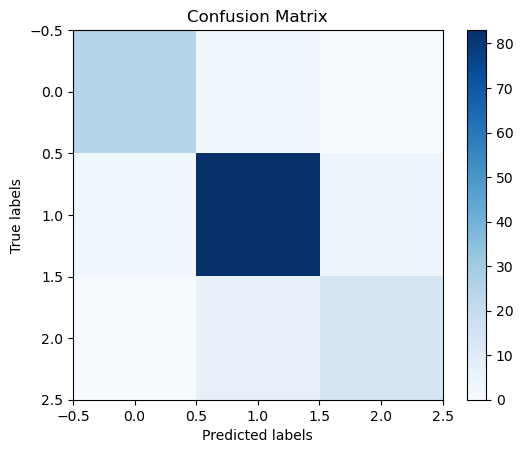

In [191]:
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority', 'log_days_open', 'log_num_open_tickets'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {feature_importances[i]}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [46]:
# # Define features (X) and target (y)
# X = df.drop(['priority', 'companies', 'made_sla', 'contact_type', 'impact', 'urgency'], axis=1)  # Exclude ticketId and priority
# y = df['priority']

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# # Train the classifier
# rf_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Get feature importances
# feature_importances = rf_classifier.feature_importances_
# print("Feature Importances:")
# for i, feature_name in enumerate(X.columns):
#     print(f"{feature_name}: {feature_importances[i]}")

# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.colorbar()
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.show()

DTypePromotionError: The DType <class 'numpy.dtypes.Int64DType'> could not be promoted by <class 'numpy.dtypes.DateTime64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.ObjectDType'>, <class 'numpy.dtypes.ObjectDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.ObjectDType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.76      0.81        42
           2       0.86      0.92      0.89       133
           3       0.81      0.69      0.75        32

    accuracy                           0.86       207
   macro avg       0.85      0.79      0.82       207
weighted avg       0.85      0.86      0.85       207

Feature Importances:
channel: 0.0
companies: 0.08886376883006226
type: 0.11252101410279958
impact: 0.33771182054122095
urgency: 0.23787994265911985
days_open: 0.07429053133316889
num_open_tickets: 0.09015664839925772
num_of_tickets_from_company_in_last_month: 0.05857627413437073


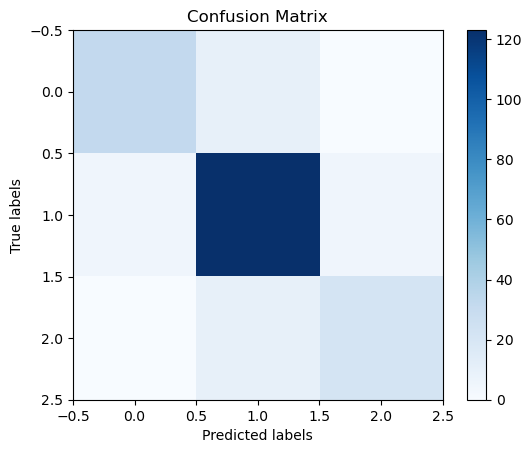

In [190]:
# Define features (X) and target (y)
X = df.drop(['priority', 'log_days_open', 'log_num_open_tickets'], axis=1)  
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate the count of each class
class_counts = y_train.value_counts()

# Calculate the desired count for each class (assuming class 2 is the majority class)
desired_counts = {1: class_counts[2]}

# Apply SMOTE to the training data with the specified sampling strategy
smote = SMOTE(sampling_strategy=desired_counts, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier with oversampled data
rf_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {feature_importances[i]}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [189]:
# Define features (X) and target (y)
X = df.drop(['priority', 'log_days_open', 'log_num_open_tickets'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = gb_classifier.feature_importances_
print("Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {feature_importances[i]}")

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.77      0.79        52
           2       0.88      0.90      0.89       182
           3       0.71      0.69      0.70        42

    accuracy                           0.84       276
   macro avg       0.80      0.79      0.79       276
weighted avg       0.84      0.84      0.84       276

Feature Importances:
channel: 0.0
companies: 0.10510944948618249
type: 0.10728855335441935
impact: 0.2888065235984151
urgency: 0.15503386274725015
days_open: 0.10153848427791942
num_open_tickets: 0.13746997652966503
num_of_tickets_from_company_in_last_month: 0.10475315000614849


In [123]:
# Calculate the correlation coefficient
correlation = df['urgency'].corr(df['priority'])

print(f"Correlation between {'impact'} and {'priority'}: {correlation}")

Correlation between impact and priority: 0.516166270428811


In [188]:
# Define features (X) and target (y)
X = df.drop(['priority', 'log_days_open', 'log_num_open_tickets'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Map class labels to start from 0
y = y - 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = xgb_classifier.feature_importances_
print("Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {feature_importances[i]}")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.91      0.86      0.88        90
           2       0.68      0.75      0.71        20

    accuracy                           0.85       138
   macro avg       0.80      0.83      0.81       138
weighted avg       0.85      0.85      0.85       138

Feature Importances:
channel: 0.0
companies: 0.06270711869001389
type: 0.18577000498771667
impact: 0.3286030888557434
urgency: 0.28508198261260986
days_open: 0.04008803516626358
num_open_tickets: 0.047669850289821625
num_of_tickets_from_company_in_last_month: 0.050079893320798874


In [187]:
# Define features (X) and target (y)
X = df.drop(['priority', 'log_days_open', 'log_num_open_tickets'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Map class labels to start from 0
y = y - 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

# Create a voting classifier with both Random Forest and XGBoost classifiers
voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)], voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Fit the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Fit the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = rf_classifier.feature_importances_
xgb_feature_importances = xgb_classifier.feature_importances_

print("\nRandom Forest Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {rf_feature_importances[i]}")

print("\nXGBoost Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {xgb_feature_importances[i]}")

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.91      0.90      0.91        90
           2       0.88      0.70      0.78        20

    accuracy                           0.88       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.88      0.88      0.88       138


Random Forest Feature Importances:
channel: 0.002360389062990681
companies: 0.10223645075412595
type: 0.09941473757704539
impact: 0.2769185829540664
urgency: 0.18941612333462918
days_open: 0.10807739931986844
num_open_tickets: 0.13918707203570338
num_of_tickets_from_company_in_last_month: 0.08238924496157062

XGBoost Feature Importances:
channel: 0.0
companies: 0.06216900795698166
type: 0.21386343240737915
impact: 0.30519723892211914
urgency: 0.27559784054756165
days_open: 0.04761609062552452
num_open_tickets: 0.05333549156785011
num_of_tickets_from_company_in_last_month: 0.04222090914845

In [194]:
# Adaboost

X = df.drop(['priority', 'log_num_open_tickets', 'log_days_open'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = ada_classifier.feature_importances_
print("Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {feature_importances[i]}")

D:\Softwares\Jupyter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.81      0.76        52
           2       0.88      0.71      0.79       182
           3       0.49      0.81      0.61        42

    accuracy                           0.75       276
   macro avg       0.70      0.78      0.72       276
weighted avg       0.79      0.75      0.76       276

Feature Importances:
channel: 0.0
companies: 0.14
type: 0.15
impact: 0.21
urgency: 0.23
days_open: 0.14
num_open_tickets: 0.11
num_of_tickets_from_company_in_last_month: 0.02


In [195]:
# Decision Trees

X = df.drop(['priority', 'log_num_open_tickets', 'log_days_open'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = tree_classifier.feature_importances_
print("Feature Importances:")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {feature_importances[i]}")

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.81      0.80        52
           2       0.88      0.88      0.88       182
           3       0.70      0.67      0.68        42

    accuracy                           0.84       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.84      0.84      0.84       276

Feature Importances:
channel: 0.0
companies: 0.10436455439873586
type: 0.09477612335523336
impact: 0.3310748776704936
urgency: 0.09961572363363602
days_open: 0.0905000987659456
num_open_tickets: 0.17602008641545858
num_of_tickets_from_company_in_last_month: 0.1036485357604969


In [196]:
# Define features (X) and target (y)
X = df.drop(['priority', 'log_num_open_tickets', 'log_days_open'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get coefficients (optional)
coefficients = logistic_classifier.coef_
intercept = logistic_classifier.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.63      0.73        52
           2       0.83      0.89      0.86       182
           3       0.66      0.64      0.65        42

    accuracy                           0.80       276
   macro avg       0.78      0.72      0.74       276
weighted avg       0.80      0.80      0.80       276

Coefficients: [[ 4.74238804e-01 -2.62643015e-02  1.88327634e+00 -2.25770979e+00
  -1.48556165e+00 -4.80573957e-03  5.80219761e-03 -1.43506157e-02]
 [-3.39194883e-01  4.10802367e-03 -3.07380895e-01 -2.65612990e-02
   1.17405402e-01 -4.23187273e-03  1.41908807e-04 -2.79648190e-02]
 [-1.35043921e-01  2.21562778e-02 -1.57589545e+00  2.28427109e+00
   1.36815625e+00  9.03761230e-03 -5.94410642e-03  4.23154347e-02]]
Intercept: [ 1.91132857  3.23372978 -5.14505836]


D:\Softwares\Jupyter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
